In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

In [2]:
start = '2010-01-01'
end = '2019-12-31'

df = pdr.DataReader('AApl','yahoo',start, end)

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473097


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.835602
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.221169
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.194122
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.616676
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139946


In [5]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000
mean,27.824672,27.329953,27.579823,27.586323,2.995931e+08,25.564386
std,14.144805,13.920329,14.022295,14.043239,2.352800e+08,14.154815
min,7.000000,6.794643,6.870357,6.858929,4.544800e+07,5.864507
25%,16.345536,16.049285,16.245983,16.178571,1.247008e+08,14.031588
50%,25.069107,24.596251,24.791250,24.870000,2.218420e+08,22.641113
75%,37.985001,37.291876,37.580626,37.638125,4.067637e+08,35.823462
max,73.492500,72.379997,72.779999,73.412498,1.880998e+09,72.139946


Reset Index

In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.535086
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.546384
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.442255
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.430344
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.473097


Droping 'Date'   and    'Adj Close'    columns

In [7]:
df= df.drop([ 'Date', 'Adj Close'], axis= 1)

In [8]:
df.head()

,High,Low,Open,Close,Volume
0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,7.571429,7.466429,7.510714,7.570714,447610800.0


Plot Close column

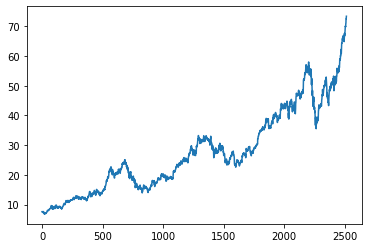

In [9]:
plt.plot(df.Close)

Fisrt 100 Rows of Close column mean()

In [10]:
ma100= df.Close.rolling(100).mean()

In [11]:
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

ploting Close column and ma100 on graph

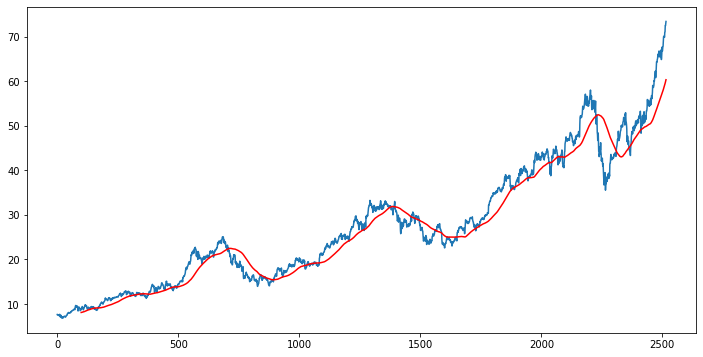

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

Fisrt 100 Rows of Close column mean()

In [13]:
ma200= df.Close.rolling(100).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

ploting Close column and ma200 on graph

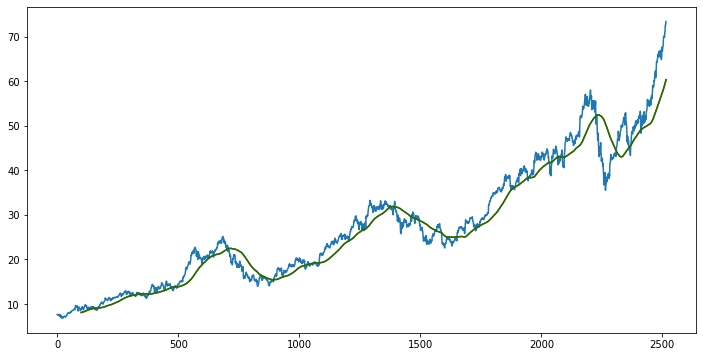

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [15]:
df.shape

(2516, 5)

In [16]:
df.isnull().sum()

High      0
Low       0
Open      0
Close     0
Volume    0
dtype: int64

Spliting Data into Training and Testing

In [17]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])




In [18]:
data_training.shape, data_testing.shape

((1761, 1), (755, 1))

In [19]:
data_training.head()    

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [20]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


Scalling down data Using min max (0,1)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)

In [23]:
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.85089656],
       [0.84616011],
       [0.84587593]])

Creating X_train and Y_train for LSTM Model

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train =np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(1661, 100, 1)

In [26]:
 y_train.shape

(1661,)

Develop Machine Learninng Model

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units=50,  activation='relu', return_sequences = True,
              input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60,  activation='relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,  activation='relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units=120,  activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(units = 1))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [30]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 18s 235ms/step - loss: 0.0549
Epoch 2/50
52/52 [==============================] - 12s 237ms/step - loss: 0.0083
Epoch 3/50
52/52 [==============================] - 13s 246ms/step - loss: 0.0071
Epoch 4/50
52/52 [==============================] - 13s 259ms/step - loss: 0.0062
Epoch 5/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0058
Epoch 6/50
52/52 [==============================] - 12s 236ms/step - loss: 0.0059
Epoch 7/50
52/52 [==============================] - 12s 235ms/step - loss: 0.0053
Epoch 8/50
52/52 [==============================] - 12s 231ms/step - loss: 0.0054
Epoch 9/50
52/52 [==============================] - 12s 226ms/step - loss: 0.0047
Epoch 10/50
52/52 [==============================] - 12s 228ms/step - loss: 0.0047
Epoch 11/50
52/52 [==============================] - 12s 234ms/step - loss: 0.0043
Epoch 12/50
52/52 [==============================] - 12s 240ms/step - loss: 0.0044
Epoch 13/50
5

Save Trained model

In [1]:
model.save('keras_LSTM.h5')

NameError: name 'model' is not defined

In [32]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [33]:
past_100_days =data_training.tail(100)

In [34]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\M_ISHFAQ\AppData\Local\Temp\ipykernel_25868\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [36]:
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.07269581],
       [0.076

In [38]:
input_data.shape

(855, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [41]:
x_test.shape, y_test.shape

((755, 100, 1), (755,))

In [42]:
y_test

array([0.06660719, 0.06833931, 0.06765694, 0.07075375, 0.07757719,
       0.08324586, 0.08387573, 0.08723495, 0.08461056, 0.08350831,
       0.08854715, 0.08849465, 0.08739241, 0.08854715, 0.08896706,
       0.08838969, 0.09841487, 0.09872982, 0.09878228, 0.09710267,
       0.09563301, 0.13447409, 0.13331935, 0.1362062 , 0.14255719,
       0.14906573, 0.15174258, 0.15373715, 0.15216249, 0.15830357,
       0.16738404, 0.1699559 , 0.16911615, 0.17105818, 0.17620198,
       0.178354  , 0.17530969, 0.17599206, 0.17740917, 0.17772417,
       0.19242073, 0.1880643 , 0.19236827, 0.19005879, 0.19100361,
       0.18827421, 0.18659456, 0.18900904, 0.18932396, 0.18822176,
       0.19593749, 0.19714469, 0.19347055, 0.20118628, 0.19268318,
       0.20097628, 0.19835189, 0.19688223, 0.19814197, 0.21346844,
       0.21514801, 0.21415073, 0.21273361, 0.21294353, 0.21855977,
       0.21462318, 0.21273361, 0.21105396, 0.21016167, 0.20207857,
       0.20297085, 0.19903426, 0.20312831, 0.19982154, 0.19709

MaKing Prediction

In [43]:
y_predicted = model.predict(x_test)

In [44]:
y_predicted.shape, x_test.shape

((755, 1), (755, 100, 1))

In [45]:
my_scaler=scaler.scale_

In [46]:
scale_factor = 1/my_scaler[0]
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

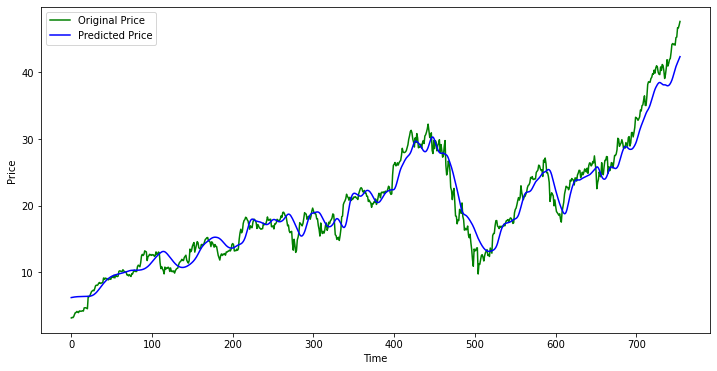

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'g', label= 'Original Price'),
plt.plot(y_predicted, 'b', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show